In [1]:
#importar as bibliotecas necessárias para fazer a exploração, pré-processamento e validação dos dados.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

In [2]:
dados = pd.read_csv('notificacoes-covid19-mg.csv',encoding = "ISO-8859-1", delimiter=";", decimal=",", nrows=500, header=0,index_col=0)

In [3]:
dados

,ID,CONTADOR,DATA_NOTIFICACAO,CLASSIFICACAO_CASO,SEXO,IDADE,FAIXA_ETARIA,MUNICIPIO_RESIDENCIA_COD,MUNICIPIO_RESIDENCIA,COMORBIDADE,EVOLUCAO,INTERNACAO,UTI,DATA_ATUALIZACAO
1,1,296297,04/03/2020,Caso Confirmado,Feminino,38,30 a 39 anos,313130.0,IPATINGA,Não Informado,RECUPERADO,NÃO,NÃO,25/06/2020
2,2,296298,07/03/2020,Caso Confirmado,Feminino,47,40 a 49 anos,312230.0,DIVINÓPOLIS,Não Informado,RECUPERADO,NÃO,NÃO,25/06/2020
3,3,296299,14/03/2020,Caso Confirmado,Masculino,65,60 a 69 anos,313670.0,JUIZ DE FORA,SIM,RECUPERADO,SIM,SIM,25/06/2020
4,4,296300,14/03/2020,Caso Confirmado,Feminino,37,30 a 39 anos,314810.0,PATROCÍNIO,Não Informado,RECUPERADO,NÃO,NÃO,25/06/2020
5,5,296301,16/03/2020,Caso Confirmado,Masculino,45,40 a 49 anos,310620.0,BELO HORIZONTE,Não Informado,RECUPERADO,NÃO,NÃO,25/06/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,503,296792,05/04/2020,Caso Confirmado,Feminino,64,60 a 69 anos,310620.0,BELO HORIZONTE,SIM,RECUPERADO,SIM,NÃO,25/06/2020
497,504,296793,13/04/2020,Caso Confirmado,Masculino,78,70 a 79 anos,315150.0,PIUMHI,SIM,OBITO,SIM,SIM,25/06/2020
498,505,296794,05/04/2020,Caso Confirmado,Feminino,67,60 a 69 anos,313670.0,JUIZ DE FORA,SIM,RECUPERADO,SIM,NÃO,25/06/2020
499,506,296795,05/04/2020,Caso Confirmado,Masculino,36,30 a 39 anos,314800.0,PATOS DE MINAS,NÃO,RECUPERADO,SIM,NÃO,25/06/2020


 # verificar os tipos de atributos

In [4]:
dados.describe(include='all')

,ID,CONTADOR,DATA_NOTIFICACAO,CLASSIFICACAO_CASO,SEXO,IDADE,FAIXA_ETARIA,MUNICIPIO_RESIDENCIA_COD,MUNICIPIO_RESIDENCIA,COMORBIDADE,EVOLUCAO,INTERNACAO,UTI,DATA_ATUALIZACAO
count,500.000000,500.000000,500,500,500,500.000000,500,493.00000,500,500,500,500,500,500
unique,NaN,NaN,33,1,2,NaN,10,NaN,58,3,3,3,3,1
top,NaN,NaN,04/04/2020,Caso Confirmado,Masculino,NaN,30 a 39 anos,NaN,BELO HORIZONTE,Não Informado,RECUPERADO,NÃO,NÃO,25/06/2020
freq,NaN,NaN,65,500,291,NaN,139,NaN,253,338,479,299,365,500
mean,252.130000,296546.500000,NaN,NaN,NaN,45.936000,NaN,312459.64503,NaN,NaN,NaN,NaN,NaN,NaN
std,146.508945,144.481833,NaN,NaN,NaN,16.634582,NaN,2327.08741,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,296297.000000,NaN,NaN,NaN,0.000000,NaN,310160.00000,NaN,NaN,NaN,NaN,NaN,NaN
25%,125.750000,296421.750000,NaN,NaN,NaN,34.000000,NaN,310620.00000,NaN,NaN,NaN,NaN,NaN,NaN
50%,250.500000,296546.500000,NaN,NaN,NaN,42.000000,NaN,310620.00000,NaN,NaN,NaN,NaN,NaN,NaN
75%,380.250000,296671.250000,NaN,NaN,NaN,58.000000,NaN,314480.00000,NaN,NaN,NaN,NaN,NaN,NaN


## Descrição de dados númericos

In [5]:
# Descrição de dados númericos 
dados.describe()

,ID,CONTADOR,IDADE,MUNICIPIO_RESIDENCIA_COD
count,500.000000,500.000000,500.000000,493.00000
mean,252.130000,296546.500000,45.936000,312459.64503
std,146.508945,144.481833,16.634582,2327.08741
min,1.000000,296297.000000,0.000000,310160.00000
25%,125.750000,296421.750000,34.000000,310620.00000
50%,250.500000,296546.500000,42.000000,310620.00000
75%,380.250000,296671.250000,58.000000,314480.00000
max,507.000000,296796.000000,94.000000,317100.00000


# Descrição de dados categóricos, datetime,object(não-númericos)

In [6]:
dados.describe(include=["category","datetime","object"])

,DATA_NOTIFICACAO,CLASSIFICACAO_CASO,SEXO,FAIXA_ETARIA,MUNICIPIO_RESIDENCIA,COMORBIDADE,EVOLUCAO,INTERNACAO,UTI,DATA_ATUALIZACAO
count,500,500,500,500,500,500,500,500,500,500
unique,33,1,2,10,58,3,3,3,3,1
top,04/04/2020,Caso Confirmado,Masculino,30 a 39 anos,BELO HORIZONTE,Não Informado,RECUPERADO,NÃO,NÃO,25/06/2020
freq,65,500,291,139,253,338,479,299,365,500


<p> O atributo ID constitui a chave da tabela</p>

<p> É excluída a data de notificação de notificação e municipio de residência por possuir diversos valores distintos (data de notificação possui 33 valor distintos e o munícipio de residência possui 58 valores destintos ) </p>

In [7]:
dadoSem = dados.drop(columns=["DATA_NOTIFICACAO","MUNICIPIO_RESIDENCIA"])
dadoSem.describe(include='all')

,ID,CONTADOR,CLASSIFICACAO_CASO,SEXO,IDADE,FAIXA_ETARIA,MUNICIPIO_RESIDENCIA_COD,COMORBIDADE,EVOLUCAO,INTERNACAO,UTI,DATA_ATUALIZACAO
count,500.000000,500.000000,500,500,500.000000,500,493.00000,500,500,500,500,500
unique,NaN,NaN,1,2,NaN,10,NaN,3,3,3,3,1
top,NaN,NaN,Caso Confirmado,Masculino,NaN,30 a 39 anos,NaN,Não Informado,RECUPERADO,NÃO,NÃO,25/06/2020
freq,NaN,NaN,500,291,NaN,139,NaN,338,479,299,365,500
mean,252.130000,296546.500000,NaN,NaN,45.936000,NaN,312459.64503,NaN,NaN,NaN,NaN,NaN
std,146.508945,144.481833,NaN,NaN,16.634582,NaN,2327.08741,NaN,NaN,NaN,NaN,NaN
min,1.000000,296297.000000,NaN,NaN,0.000000,NaN,310160.00000,NaN,NaN,NaN,NaN,NaN
25%,125.750000,296421.750000,NaN,NaN,34.000000,NaN,310620.00000,NaN,NaN,NaN,NaN,NaN
50%,250.500000,296546.500000,NaN,NaN,42.000000,NaN,310620.00000,NaN,NaN,NaN,NaN,NaN
75%,380.250000,296671.250000,NaN,NaN,58.000000,NaN,314480.00000,NaN,NaN,NaN,NaN,NaN


 # criar dammy para os atributos 

In [8]:
# facilmente se percebe q o algoritmo não trabalha com atributos categóricos
sexoDummy = pd.get_dummies(dados["SEXO"], prefix="SEXO")
evolucaoDummy= pd.get_dummies(dados["EVOLUCAO"], prefix="EVOLUCAO")
comorbilidadeDummy= pd.get_dummies(dados["COMORBIDADE"], prefix="COMORBIDADE")
internacaoDummy= pd.get_dummies(dados["INTERNACAO"], prefix="INTERNACAO")
utiDummy= pd.get_dummies(dados["UTI"], prefix="UTI")
# adicionar as novas colunas aos dados
dados=pd.concat([dados,sexoDummy,evolucaoDummy,comorbilidadeDummy,internacaoDummy,utiDummy], axis=1)
dados

,ID,CONTADOR,DATA_NOTIFICACAO,CLASSIFICACAO_CASO,SEXO,IDADE,FAIXA_ETARIA,MUNICIPIO_RESIDENCIA_COD,MUNICIPIO_RESIDENCIA,COMORBIDADE,...,EVOLUCAO_RECUPERADO,COMORBIDADE_NÃO,COMORBIDADE_Não Informado,COMORBIDADE_SIM,INTERNACAO_NÃO,INTERNACAO_NÃO INFORMADO,INTERNACAO_SIM,UTI_NÃO,UTI_NÃO INFORMADO,UTI_SIM
1,1,296297,04/03/2020,Caso Confirmado,Feminino,38,30 a 39 anos,313130.0,IPATINGA,Não Informado,...,1,0,1,0,1,0,0,1,0,0
2,2,296298,07/03/2020,Caso Confirmado,Feminino,47,40 a 49 anos,312230.0,DIVINÓPOLIS,Não Informado,...,1,0,1,0,1,0,0,1,0,0
3,3,296299,14/03/2020,Caso Confirmado,Masculino,65,60 a 69 anos,313670.0,JUIZ DE FORA,SIM,...,1,0,0,1,0,0,1,0,0,1
4,4,296300,14/03/2020,Caso Confirmado,Feminino,37,30 a 39 anos,314810.0,PATROCÍNIO,Não Informado,...,1,0,1,0,1,0,0,1,0,0
5,5,296301,16/03/2020,Caso Confirmado,Masculino,45,40 a 49 anos,310620.0,BELO HORIZONTE,Não Informado,...,1,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,503,296792,05/04/2020,Caso Confirmado,Feminino,64,60 a 69 anos,310620.0,BELO HORIZONTE,SIM,...,1,0,0,1,0,0,1,1,0,0
497,504,296793,13/04/2020,Caso Confirmado,Masculino,78,70 a 79 anos,315150.0,PIUMHI,SIM,...,0,0,0,1,0,0,1,0,0,1
498,505,296794,05/04/2020,Caso Confirmado,Feminino,67,60 a 69 anos,313670.0,JUIZ DE FORA,SIM,...,1,0,0,1,0,0,1,1,0,0
499,506,296795,05/04/2020,Caso Confirmado,Masculino,36,30 a 39 anos,314800.0,PATOS DE MINAS,NÃO,...,1,1,0,0,0,0,1,1,0,0


<p>Criaram-se dummys para os atributos com a respostas do tipo sim/não, para o sexo e para as perguntas com a resposta do tipo Recuperado/obito </p>

# Eliminar os atributos após criar os dummys

In [9]:
dadoSem = dados.drop(columns=["CONTADOR","CLASSIFICACAO_CASO","FAIXA_ETARIA","DATA_NOTIFICACAO","MUNICIPIO_RESIDENCIA","SEXO","EVOLUCAO","COMORBIDADE","INTERNACAO","UTI","DATA_ATUALIZACAO","MUNICIPIO_RESIDENCIA_COD",'COMORBIDADE_NÃO', 'INTERNACAO_NÃO INFORMADO','EVOLUCAO_RECUPERADO','EVOLUCAO_EM ACOMPANHAMENTO','UTI_NÃO INFORMADO','EVOLUCAO_OBITO'])
dadoSem

,ID,IDADE,SEXO_Feminino,SEXO_Masculino,COMORBIDADE_Não Informado,COMORBIDADE_SIM,INTERNACAO_NÃO,INTERNACAO_SIM,UTI_NÃO,UTI_SIM
1,1,38,1,0,1,0,1,0,1,0
2,2,47,1,0,1,0,1,0,1,0
3,3,65,0,1,0,1,0,1,0,1
4,4,37,1,0,1,0,1,0,1,0
5,5,45,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
496,503,64,1,0,0,1,0,1,1,0
497,504,78,0,1,0,1,0,1,0,1
498,505,67,1,0,0,1,0,1,1,0
499,506,36,0,1,0,0,0,1,1,0


# REGRESSÃO LINEAR

## método supervisionado

In [10]:
import statsmodels.api as sm
dadosIdade=dadoSem.drop(columns="IDADE")
dadoSem.replace([np.inf, -np.inf], np.nan)
dadoSem.dropna(inplace=True)
dadosconst= sm.add_constant(dadosIdade)
modelo=sm.OLS(dadoSem["IDADE"],dadosconst).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  IDADE   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     19.79
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           6.13e-26
Time:                        23:01:28   Log-Likelihood:                -2044.9
No. Observations:                 500   AIC:                             4108.
Df Residuals:                     491   BIC:                             4146.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        16.7652      2.842      5.899      0.000      11.181      22.349
ID                            0.0220      0.006      3.978      0.000       0.011       0.033
SEXO_Feminino                 8.4251      1.605      5.251      0.000       5.272      11.578
SEXO_Masculino                8.3402      1.533      5.442      0.000       5.329      11.351
COMORBIDADE_Não Informado     6.6406      2.972      2.234      0.026       0.801      12.480
COMORBIDADE_SIM               8.6476      3.037      2.847      0.005       2.680      14.615
INTERNACAO_NÃO                2.8005      7.225      0.388      0.698     -11.396      16.997
INTERNACAO_SIM               13.9590      6.811      2.050      0.041       0.577      27.341
UTI_NÃO                       3.1878      6.814      0.468      0.640     -10.201      16.577
UTI_SIM                       9.0656      6.866      1.320      0.187      -4.424      22.556
==============================================================================
Omnibus:                       15.200   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.737
Skew:                           0.413   Prob(JB):                     0.000383
Kurtosis:                       3.268   Cond. No.                     2.17e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  9e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Apôs analisar os resultados,  é possivel perceber atráves do valor de R-Squared (0.244) que este modelo não é MAU  e vemos que todas as instâncias são significativas, excepto as instância "INTERNACAO_NÃO","UTI_NÃO " uma vez que estes possuem um  valor de P>|t| superior a 5%.
### Vamos analisar uma instância significativa, por exemplo, a instância INTERNACAO_SIM. Segundo a tabela, quanto maior for a idade , há um aumento de 13.95905  relativamente ao número de internados, oque faz sentindo em alguns casos tendo em conta que as pessoas com uma idade avançada pertecem a um grupo de risco.

# Avaliar os valores de confienciente de correlação

<AxesSubplot:>

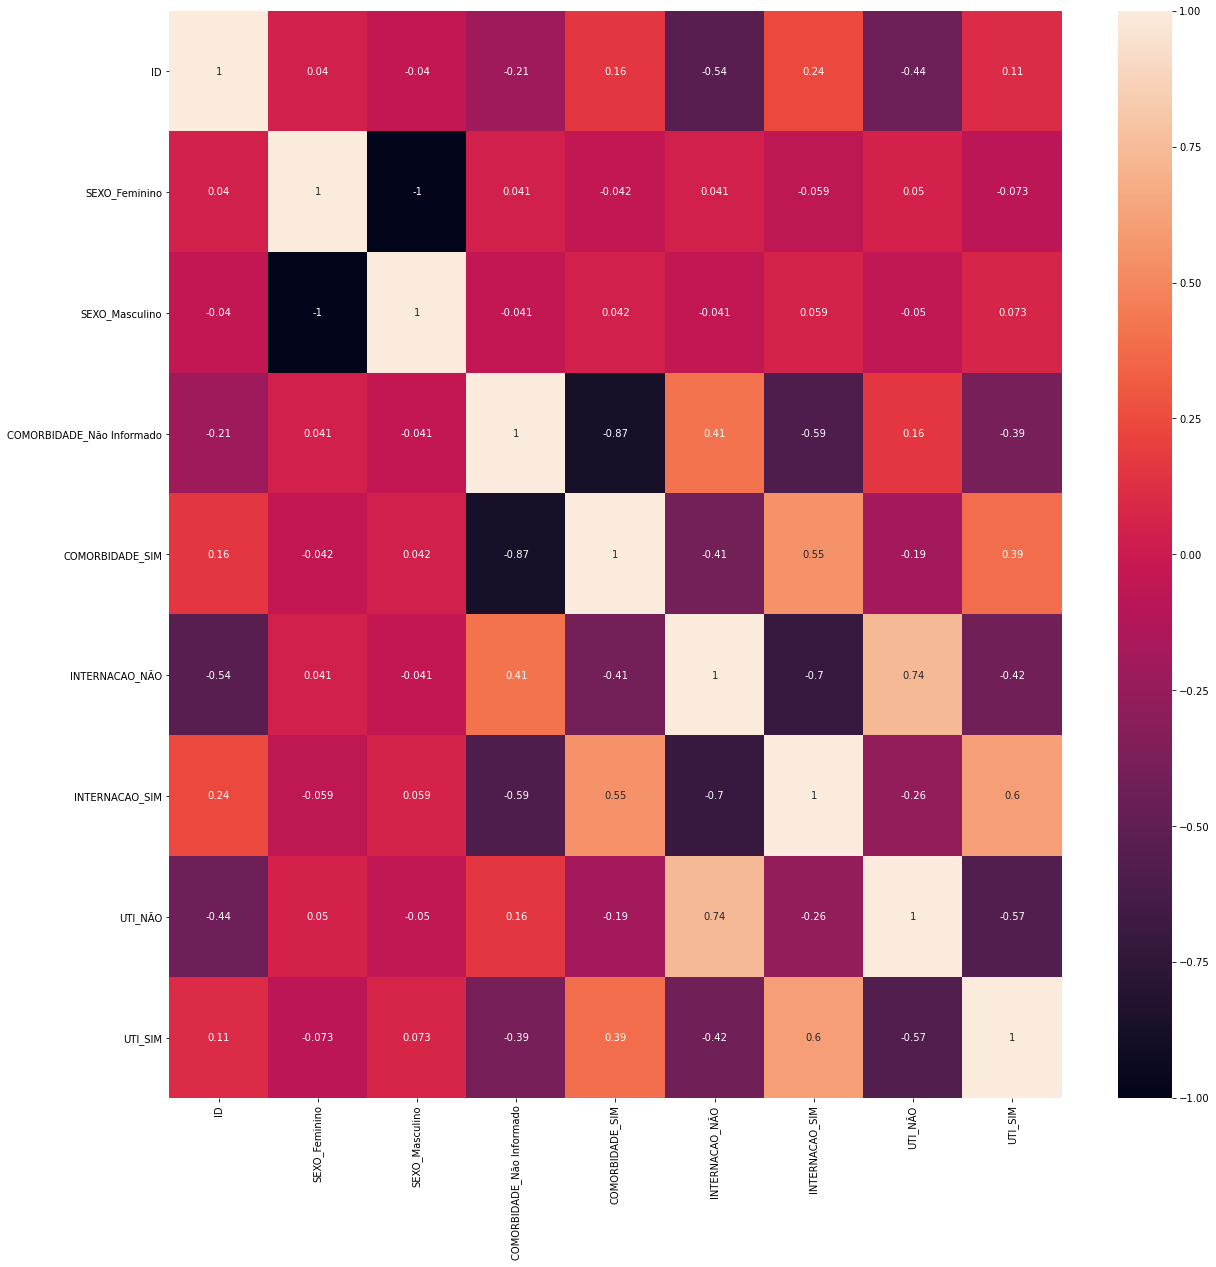

In [11]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
correlacao=dadosIdade.corr(method="pearson")
sb.heatmap(correlacao, annot=True)

In [16]:
limiteSup = 0.8
corrSinal = abs(correlacao)

corrVet = corrSinal.melt(value_vars=corrSinal.columns)

removerValores = corrVet[corrVet.values[:,1]>limiteSup]
removerValores = removerValores[removerValores.values[:,1]<1]
removerValores = removerValores.sort_values(by="value", ascending=False)

removerValores

,variable,value
11,SEXO_Feminino,1.000000
19,SEXO_Masculino,1.000000
31,COMORBIDADE_Não Informado,0.869548
39,COMORBIDADE_SIM,0.869548


In [17]:
dadosConsertados = dadosconst.copy()
listaElim = []
for i in range(0,len(removerValores),2) :
    if removerValores.iloc[i,0] not in listaElim :
        listaElim.append(removerValores.iloc[i,0])
        dadosConsertados=dadosConsertados.drop(columns=listaElim[int(i/2)])

#foi removido Ave_OE_estational_Age_Wks devido ao valor de correlação que ultrapassa o permitido
dadosConsertados

,const,ID,SEXO_Masculino,COMORBIDADE_SIM,INTERNACAO_NÃO,INTERNACAO_SIM,UTI_NÃO,UTI_SIM
1,1.0,1,0,0,1,0,1,0
2,1.0,2,0,0,1,0,1,0
3,1.0,3,1,1,0,1,0,1
4,1.0,4,0,0,1,0,1,0
5,1.0,5,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
496,1.0,503,0,1,0,1,1,0
497,1.0,504,1,1,0,1,0,1
498,1.0,505,0,1,0,1,1,0
499,1.0,506,1,0,0,1,1,0


In [18]:
modelo=sm.OLS(dadoSem["IDADE"],dadosconst).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  IDADE   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     19.79
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           6.13e-26
Time:                        23:01:55   Log-Likelihood:                -2044.9
No. Observations:                 500   AIC:                             4108.
Df Residuals:                     491   BIC:                             4146.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        16.7652      2.842      5.899      0.000      11.181      22.349
ID                            0.0220      0.006      3.978      0.000       0.011       0.033
SEXO_Feminino                 8.4251      1.605      5.251      0.000       5.272      11.578
SEXO_Masculino                8.3402      1.533      5.442      0.000       5.329      11.351
COMORBIDADE_Não Informado     6.6406      2.972      2.234      0.026       0.801      12.480
COMORBIDADE_SIM               8.6476      3.037      2.847      0.005       2.680      14.615
INTERNACAO_NÃO                2.8005      7.225      0.388      0.698     -11.396      16.997
INTERNACAO_SIM               13.9590      6.811      2.050      0.041       0.577      27.341
UTI_NÃO                       3.1878      6.814      0.468      0.640     -10.201      16.577
UTI_SIM                       9.0656      6.866      1.320      0.187      -4.424      22.556
==============================================================================
Omnibus:                       15.200   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.737
Skew:                           0.413   Prob(JB):                     0.000383
Kurtosis:                       3.268   Cond. No.                     2.17e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  9e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Apôs analisar os resultados,  é possivel perceber atráves do valor de R-Squared (0.244) que este modelo  continua  MAU  e vemos que todas as instâncias são significativas, porque os  P>|t| são infoeriores a 5%

# Algoritmos Hierárquicos

In [19]:
idade = dadoSem.drop(["IDADE"], axis=1)
from scipy.cluster.hierarchy import linkage, dendrogram
modelo=linkage (idade, method='ward', metric='euclidean')
modelo

array([[0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 2.00000000e+00],
       [6.00000000e+00, 7.00000000e+00, 1.00000000e+00, 2.00000000e+00],
       [8.00000000e+00, 9.00000000e+00, 1.00000000e+00, 2.00000000e+00],
       ...,
       [9.91000000e+02, 9.94000000e+02, 1.12407242e+03, 2.18000000e+02],
       [9.92000000e+02, 9.95000000e+02, 1.63069063e+03, 2.82000000e+02],
       [9.96000000e+02, 9.97000000e+02, 3.96566264e+03, 5.00000000e+02]])

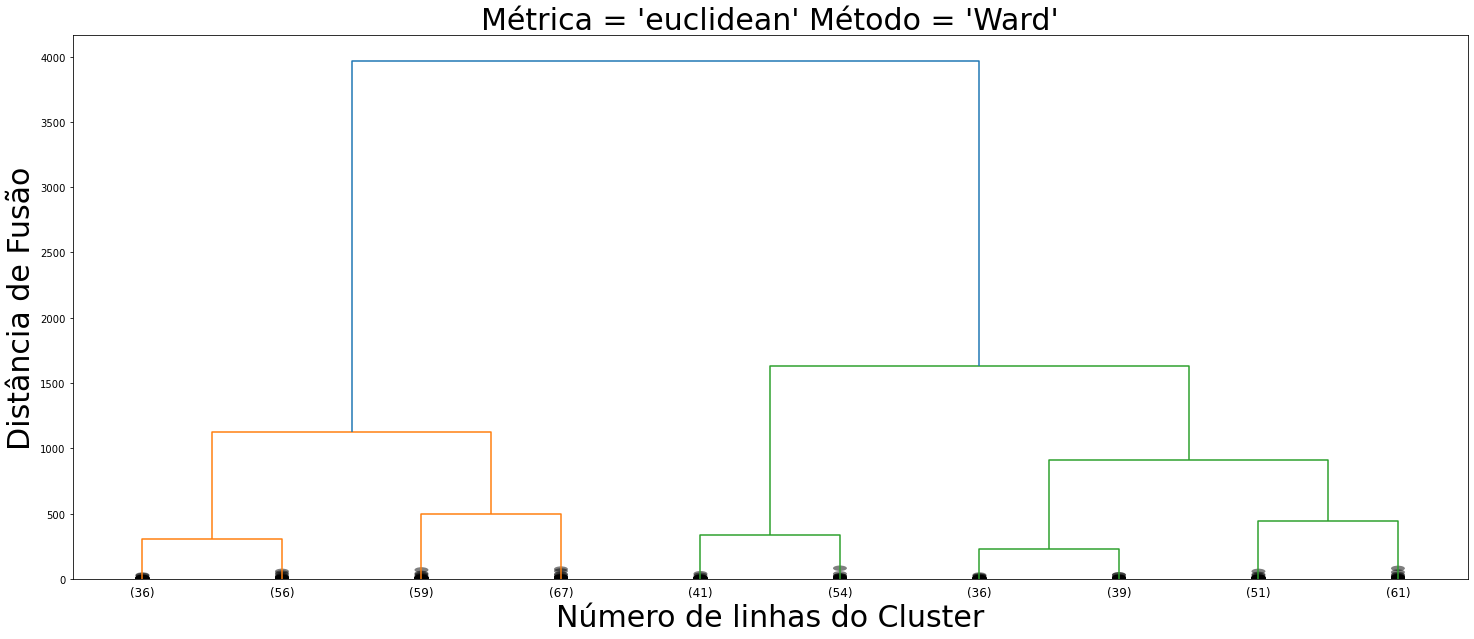

In [20]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25,10))
plt.title("Métrica = 'euclidean' Método = 'Ward'", fontsize=30)
plt.xlabel("Número de linhas do Cluster", fontsize=30)
plt.ylabel("Distância de Fusão", fontsize=30)
dendrogram(modelo, p=10, truncate_mode='lastp', show_contracted=True)
plt.show()

 Neste dendrograma é possivel perceber que o número de clusters é 2, para avaliar mellhor essa conclusão iremos elaborar gráficos.

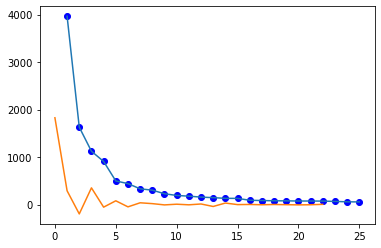

In [21]:
from numpy import arange, diff
ultimAgl = modelo[-25:,2]
ultimAgl = ultimAgl[::-1]
from numpy import arange
dif = diff(ultimAgl, 2)
noCluster=arange(1,len(ultimAgl)+1)
plt.plot(noCluster,ultimAgl,'bo',noCluster,ultimAgl,dif)

 # o método ilustra através de  gráfico que o número de clusters é  2 .

# Normalizar os dados 

In [22]:
from sklearn.preprocessing import scale
from pandas import DataFrame, Categorical, concat, crosstab

Norm = DataFrame(scale(idade), columns=idade.columns)
Norm


,ID,SEXO_Feminino,SEXO_Masculino,COMORBIDADE_Não Informado,COMORBIDADE_SIM,INTERNACAO_NÃO,INTERNACAO_SIM,UTI_NÃO,UTI_SIM
0,-1.715810,1.179976,-1.179976,0.692308,-0.601995,0.819903,-0.577350,0.608164,-0.347960
1,-1.708978,1.179976,-1.179976,0.692308,-0.601995,0.819903,-0.577350,0.608164,-0.347960
2,-1.702145,-0.847475,0.847475,-1.444444,1.661144,-1.219657,1.732051,-1.644294,2.873893
3,-1.695313,1.179976,-1.179976,0.692308,-0.601995,0.819903,-0.577350,0.608164,-0.347960
4,-1.688481,-0.847475,0.847475,0.692308,-0.601995,0.819903,-0.577350,0.608164,-0.347960
...,...,...,...,...,...,...,...,...,...
495,1.714034,1.179976,-1.179976,-1.444444,1.661144,-1.219657,1.732051,0.608164,-0.347960
496,1.720866,-0.847475,0.847475,-1.444444,1.661144,-1.219657,1.732051,-1.644294,2.873893
497,1.727698,1.179976,-1.179976,-1.444444,1.661144,-1.219657,1.732051,0.608164,-0.347960
498,1.734531,-0.847475,0.847475,-1.444444,-0.601995,-1.219657,1.732051,0.608164,-0.347960


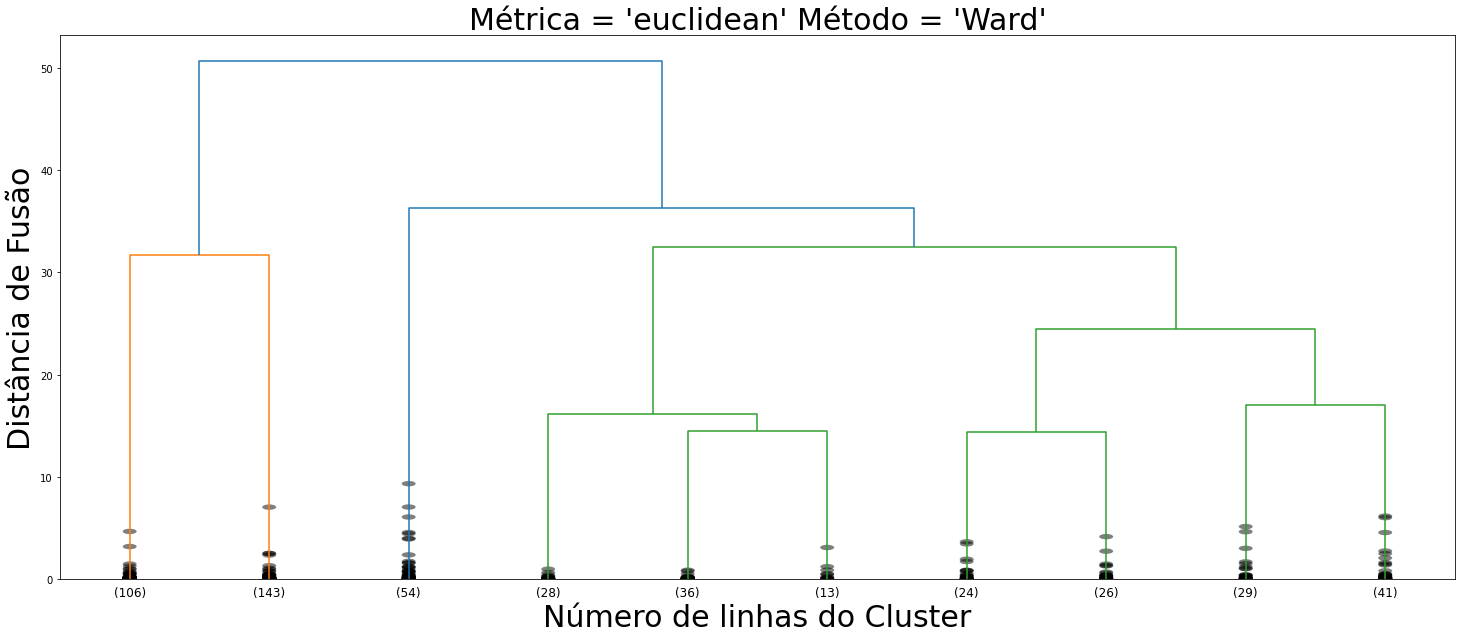

In [23]:
modelo=linkage (Norm, method='ward', metric='euclidean')
plt.figure(figsize=(25,10))
plt.title("Métrica = 'euclidean' Método = 'Ward'", fontsize=30)
plt.xlabel("Número de linhas do Cluster", fontsize=30)
plt.ylabel("Distância de Fusão", fontsize=30)
dendrogram(modelo, p=10, truncate_mode='lastp', show_contracted=True)
plt.show()

 ### O gráfico sofreu alterações comapradamente ao gráfico anterior, mas continuamos com 2 clusters.

# Gráfico Cotovelo


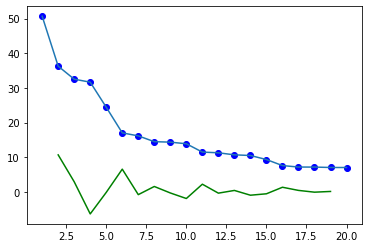

In [24]:

from numpy import arange, diff
ultVal = modelo[-20:,2]
ultVal = ultVal[::-1]
dif = diff(ultVal, 2)
noCluster=arange(1,len(ultVal)+1)

plt.plot(noCluster, ultVal,'bo', noCluster, ultVal, noCluster[:-2]+1, dif, 'g-')

 # Conforme podemos perceber o número  clusters é 2.

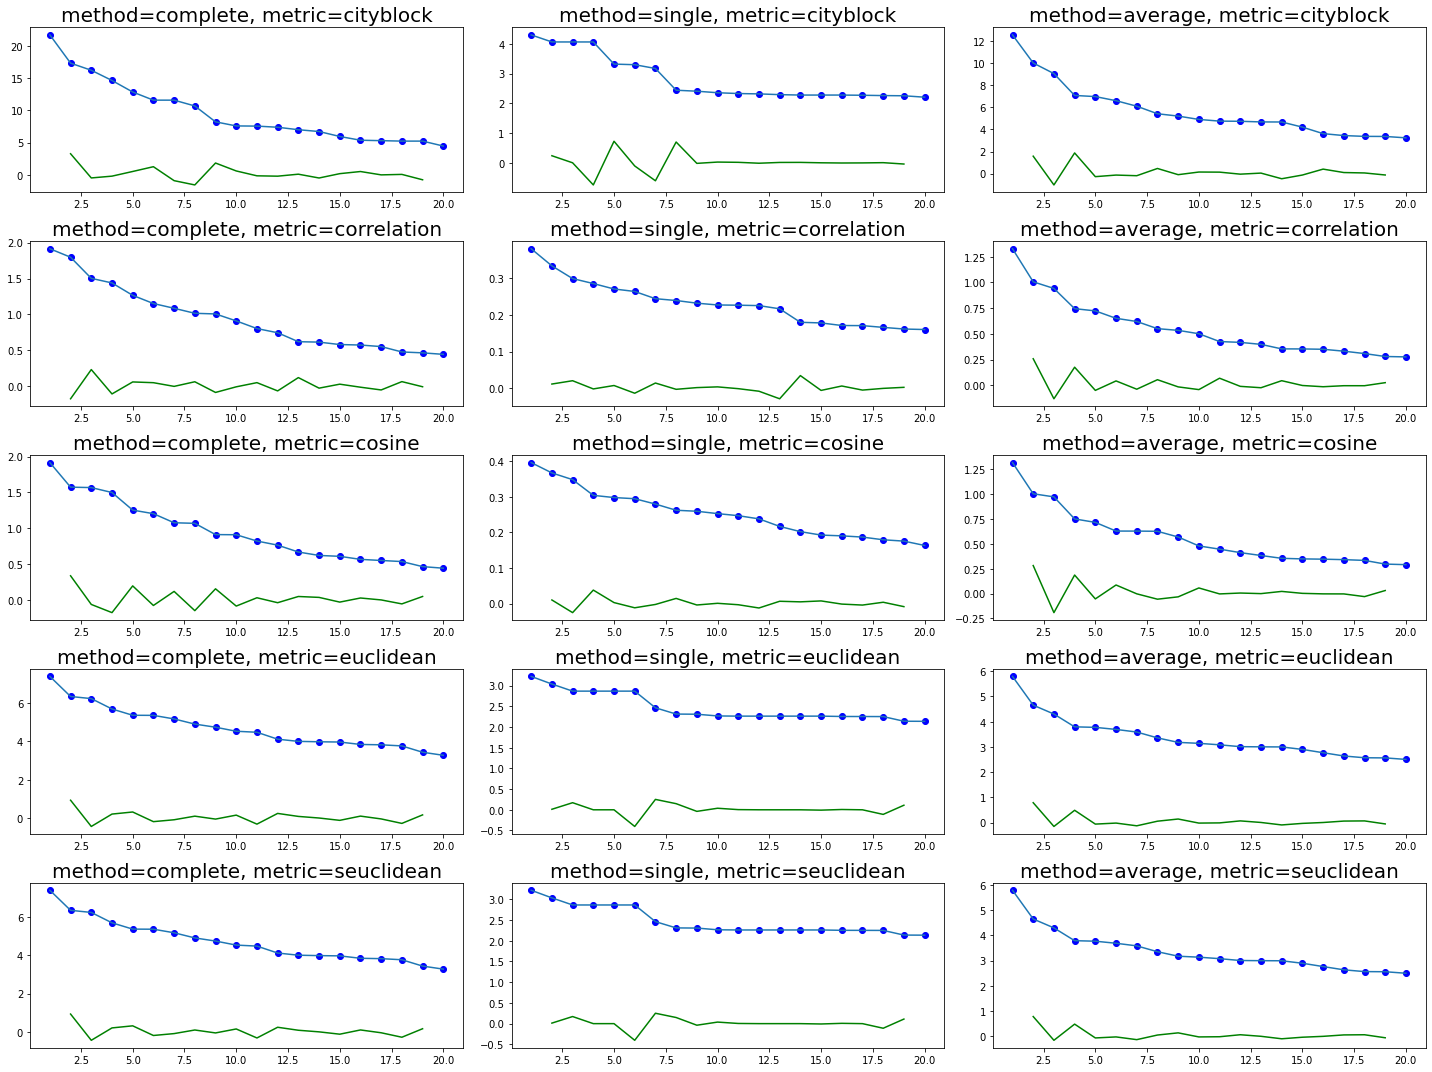

In [25]:
fig, eixos = plt.subplots(5,3, figsize=(20,15))
noCluster=arange(1,21)
col = 0
for m in ['complete', 'single', 'average']:
    linha = 0
    for mt in ['cityblock','correlation','cosine','euclidean','seuclidean']:
        modelo=linkage (Norm, method=m, metric=mt)
        ultVal = modelo[-20:,2]
        ultVal = ultVal[::-1]
        dif = diff(ultVal, 2)
        eixos[linha,col].plot(noCluster, ultVal,'bo', noCluster, ultVal, noCluster[:-2]+1, dif, 'g-')
        eixos[linha,col].set_title("method="+m+", metric="+mt, fontsize=20)
        linha+=1
    col+=1
plt.tight_layout()
plt.show()

# Algoritmos Não Hierárquicos

In [26]:
from sklearn.cluster import KMeans
modeloKM = KMeans (n_clusters=2, init="k-means++")
modeloKM.fit(idade)
print("Erro Quadrado: ",modeloKM.inertia_)
print("Posição dos Centroides:")
DataFrame(modeloKM.cluster_centers_, columns=idade.columns)

Erro Quadrado:  2692799.080795635
Posição dos Centroides:


,ID,SEXO_Feminino,SEXO_Masculino,COMORBIDADE_Não Informado,COMORBIDADE_SIM,INTERNACAO_NÃO,INTERNACAO_SIM,UTI_NÃO,UTI_SIM
0,127.000000,0.383399,0.616601,0.743083,0.229249,0.830040,0.169960,0.909091,0.083004
1,380.299595,0.453441,0.546559,0.607287,0.303644,0.360324,0.331984,0.546559,0.133603


# 3º RAC 

In [27]:
from pandas import DataFrame
VDD = DataFrame(dados["FAIXA_ETARIA"].map({'0 a 9 anos':1, '10 a 19 anos':2, '20 a 29 anos':3,
                               '30 a 39 anos':4, '40 a 49 anos':5, '50 a 59 anos':6,'60 a 69 anos':7,'70 a 79 anos':8,'80 a 89 anos':9,'90 ou mais ':10}))
VDD.value_counts()

FAIXA_ETARIA
4.0             139
5.0             103
6.0              71
7.0              68
3.0              59
8.0              27
9.0              19
2.0               9
1.0               3
dtype: int64

In [28]:
#dadoSem2 = dados.drop(columns=["CONTADOR","CLASSIFICACAO_CASO","FAIXA_ETARIA","DATA_NOTIFICACAO","MUNICIPIO_RESIDENCIA","EVOLUCAO","COMORBIDADE","INTERNACAO","UTI","DATA_ATUALIZACAO"])
dadoSem.replace([np.inf, -np.inf], np.nan)
dadoSem.dropna(inplace=True)

In [29]:
from sklearn.tree import DecisionTreeClassifier

VD = dadoSem["INTERNACAO_SIM"]
VIs = dadoSem.drop(columns=["INTERNACAO_SIM", "COMORBIDADE_SIM","INTERNACAO_NÃO","IDADE"])

classificador=DecisionTreeClassifier(criterion= "gini")
modelo = classificador.fit(VIs, VD)
pd.DataFrame(modelo.feature_importances_, index=VIs.columns, columns=["Importância"]).T

,ID,SEXO_Feminino,SEXO_Masculino,COMORBIDADE_Não Informado,UTI_NÃO,UTI_SIM
Importância,0.422007,0.016822,0.003048,0.156917,0.037977,0.363229


O atributo com maior impacto no modelo é  a **UTI_SIM**, o que faz sentido.  há uma correlação significativa entre uma pessoa que está internda ir para a *UTI*.

# Árvore de classificação sem poda

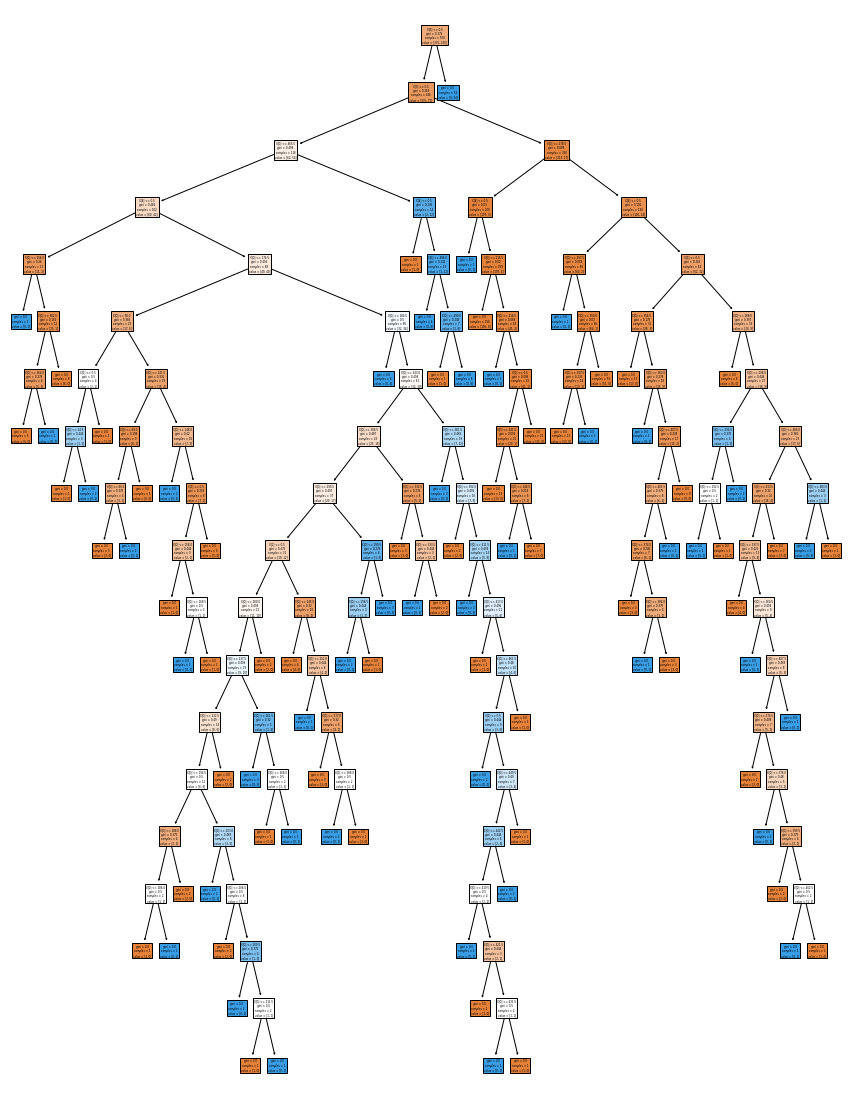

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,20))
plot_tree(modelo, filled=True)
plt.show()

A árvore apresenta sobreajustamento, porque tem excesso de ramos. Isto torna-a difícil de interpretar e generalizar o modelo aprendido. Teremos de aplicar a pós-poda.

# Árvore de classificação após a poda

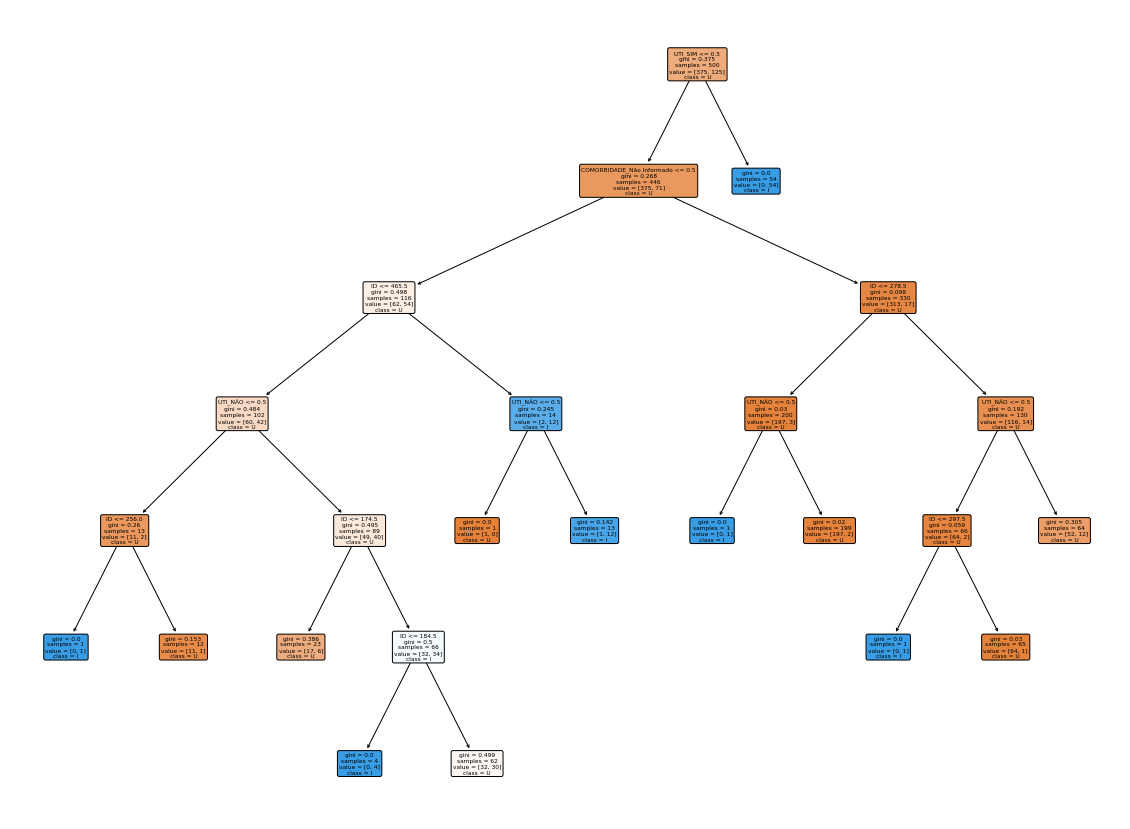

In [43]:
classificador=DecisionTreeClassifier(criterion= "gini", ccp_alpha=0.003)
modeloGini = classificador.fit(VIs, VD)

plt.figure(figsize=(20,15))
plot_tree(modeloGini, filled=True, feature_names=VIs.columns, rounded=True,
          class_names=str(dadoSem["INTERNACAO_SIM"].value_counts().index))
plt.show()

A árvore apresentada melhor o sobreajustamento  em relação a arvore anterior, vamos utilizar o critério da entropia

## Construção do modelo usando o critério da entropia e respetiva visualização

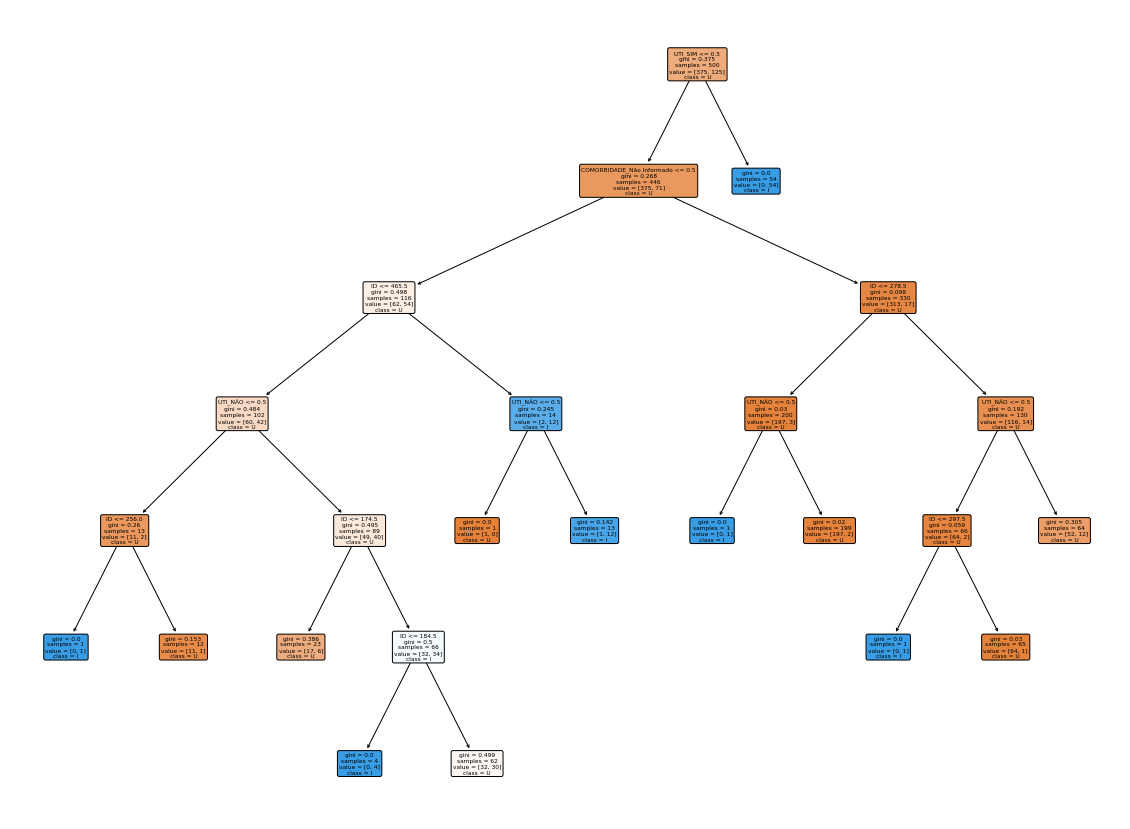

In [44]:
classificador=DecisionTreeClassifier(criterion= "entropy", ccp_alpha=0.003)
modeloEntropy = classificador.fit(VIs, VD)

plt.figure(figsize=(20,15))
plot_tree(modeloGini, filled=True, feature_names=VIs.columns, rounded=True,
          class_names=str(dadoSem["INTERNACAO_SIM"].value_counts().index))
plt.show()

Está árvore é semelhante a árvore anterior mas tem regras para todos os valores de  VD.

# Comparação utilizando a matriz de confusão .

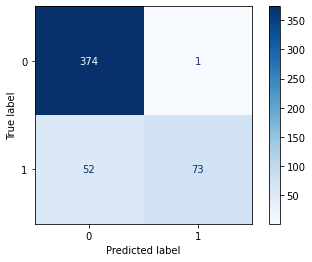

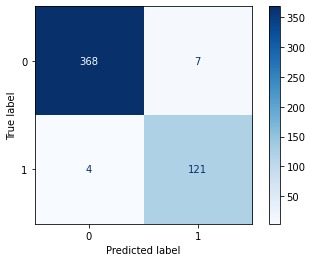

In [45]:
from sklearn.metrics import plot_confusion_matrix
for i in [modeloGini, modeloEntropy]:
    plot_confusion_matrix(i, VIs, VD, display_labels=dadoSem["INTERNACAO_SIM"].value_counts().index, cmap=plt.cm.Blues)

As matrizes de confusão apresentam uma  grande semelhaça.

In [46]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, matthews_corrcoef
prevGini = modeloGini.predict(VIs)
prevEntrop = modeloEntropy.predict(VIs)
pd.DataFrame({'Gini': [accuracy_score(VD, prevGini), cohen_kappa_score(VD, prevGini), matthews_corrcoef(VD, prevGini)],
         'Entropia': [accuracy_score(VD, prevEntrop), cohen_kappa_score(VD, prevEntrop), matthews_corrcoef(VD, prevEntrop)]},
          index=['precisão', 'κ de Cohen', 'φ de Matthews'])

,Gini,Entropia
precisão,0.894000,0.978000
κ de Cohen,0.672840,0.941799
φ de Matthews,0.708884,0.941918


# Representação textual da árvore

In [47]:
from sklearn.tree import export_text
print(export_text(modeloEntropy, feature_names=list(VIs.columns), show_weights=True))

|--- UTI_SIM <= 0.50
|   |--- COMORBIDADE_Não Informado <= 0.50
|   |   |--- ID <= 465.50
|   |   |   |--- UTI_NÃO <= 0.50
|   |   |   |   |--- ID <= 256.00
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ID >  256.00
|   |   |   |   |   |--- ID <= 382.50
|   |   |   |   |   |   |--- ID <= 364.00
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- ID >  364.00
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- ID >  382.50
|   |   |   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |   |--- UTI_NÃO >  0.50
|   |   |   |   |--- ID <= 174.50
|   |   |   |   |   |--- ID <= 38.00
|   |   |   |   |   |   |--- ID <= 14.50
|   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |--- ID >  14.50
|   |   |   |   |   |   |   |--- SEXO_Feminino <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |---

# Árvore de Regressão

In [48]:

VIreg=pd.concat([dadoSem,VDD], axis=1)
VDreg=VIreg['IDADE']
VDreg = VDreg.fillna(0)
VIreg = VIreg.fillna(0)

VIreg

,ID,IDADE,SEXO_Feminino,SEXO_Masculino,COMORBIDADE_Não Informado,COMORBIDADE_SIM,INTERNACAO_NÃO,INTERNACAO_SIM,UTI_NÃO,UTI_SIM,FAIXA_ETARIA
1,1,38,1,0,1,0,1,0,1,0,4.0
2,2,47,1,0,1,0,1,0,1,0,5.0
3,3,65,0,1,0,1,0,1,0,1,7.0
4,4,37,1,0,1,0,1,0,1,0,4.0
5,5,45,0,1,1,0,1,0,1,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
496,503,64,1,0,0,1,0,1,1,0,7.0
497,504,78,0,1,0,1,0,1,0,1,8.0
498,505,67,1,0,0,1,0,1,1,0,7.0
499,506,36,0,1,0,0,0,1,1,0,4.0


# Devisão de amostras

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
VIregTreino, VIregTeste, VDregTreino, VDregTeste = train_test_split(VIreg, VDreg, test_size=0.30, random_state=1, shuffle=True)
regressor=DecisionTreeRegressor(criterion= "mse")
modelo = regressor.fit (VIregTreino, VDregTreino)
pd.DataFrame(modelo.feature_importances_, index=VIregTreino.columns, columns=["Importância"]).T

,ID,IDADE,SEXO_Feminino,SEXO_Masculino,COMORBIDADE_Não Informado,COMORBIDADE_SIM,INTERNACAO_NÃO,INTERNACAO_SIM,UTI_NÃO,UTI_SIM,FAIXA_ETARIA
Importância,0.000772,0.982499,0.000017,0.000172,0.0,0.000019,0.00002,0.0,0.00001,0.0,0.016491


<p> Com base nos dados da tabela anterior é possivel perceber que a idade agora tem maior impacto.</p>

# Árvore de regressão sem poda

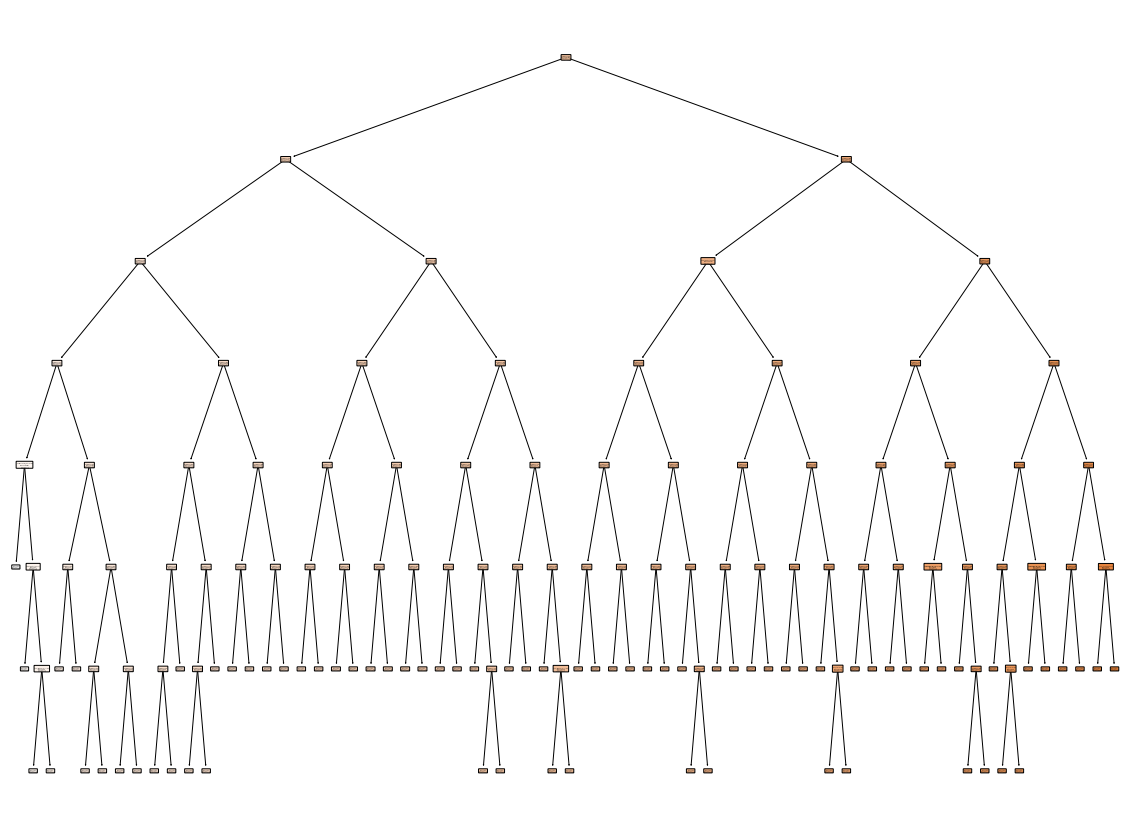

In [71]:
plt.figure(figsize=(20,15))
plot_tree(modelo, filled=True, feature_names=VIregTreino.columns, rounded=True)
plt.show()

A arvore está um pouco sobre ajustada, vamos utilizar pós-poda.

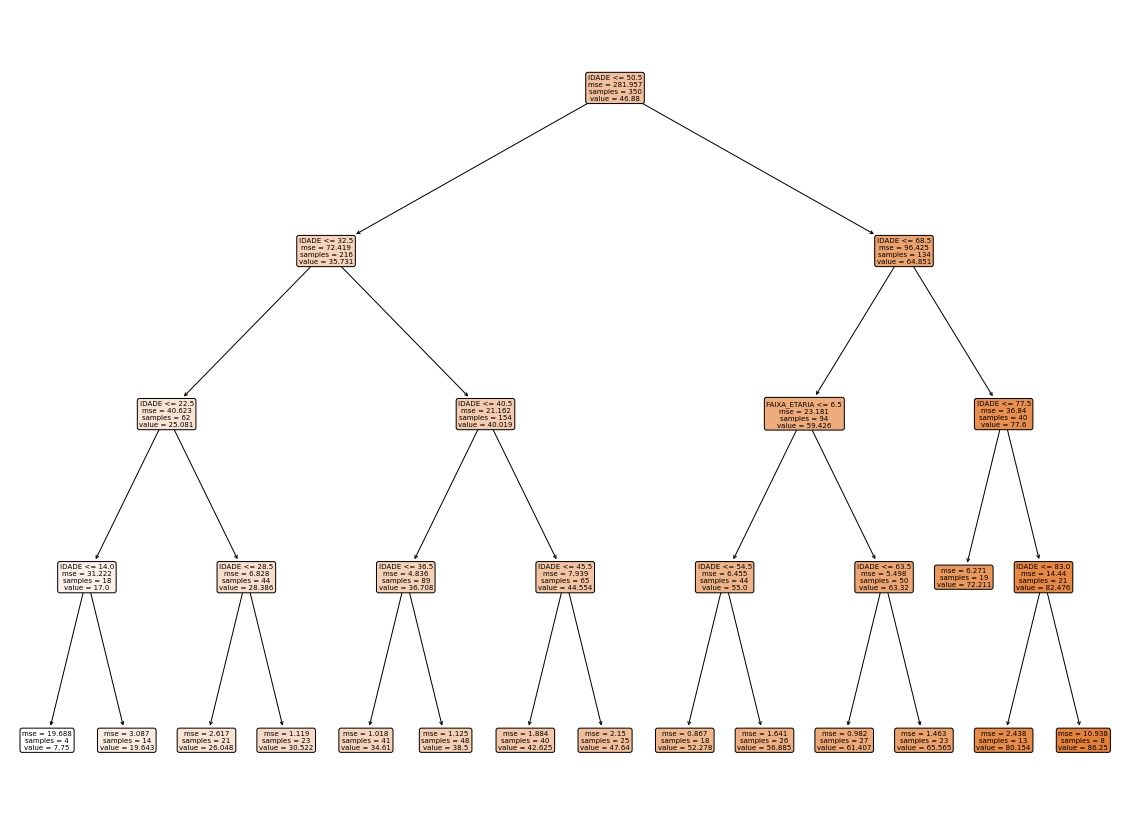

In [52]:
regressor=DecisionTreeRegressor(criterion= "mse", ccp_alpha=0.3)
modelo = regressor.fit (VIregTreino, VDregTreino)
plt.figure(figsize=(20,15))
plot_tree(modelo, filled=True, feature_names=VIregTreino.columns, rounded=True)
plt.show()

Está árvore apresenta um aspecto mais simples de interpretar.

# Representação textual da árvore de regressão

In [53]:
print(export_text(modelo, feature_names=list(VIreg.columns), show_weights=True))

|--- IDADE <= 50.50
|   |--- IDADE <= 32.50
|   |   |--- IDADE <= 22.50
|   |   |   |--- IDADE <= 14.00
|   |   |   |   |--- value: [7.75]
|   |   |   |--- IDADE >  14.00
|   |   |   |   |--- value: [19.64]
|   |   |--- IDADE >  22.50
|   |   |   |--- IDADE <= 28.50
|   |   |   |   |--- value: [26.05]
|   |   |   |--- IDADE >  28.50
|   |   |   |   |--- value: [30.52]
|   |--- IDADE >  32.50
|   |   |--- IDADE <= 40.50
|   |   |   |--- IDADE <= 36.50
|   |   |   |   |--- value: [34.61]
|   |   |   |--- IDADE >  36.50
|   |   |   |   |--- value: [38.50]
|   |   |--- IDADE >  40.50
|   |   |   |--- IDADE <= 45.50
|   |   |   |   |--- value: [42.62]
|   |   |   |--- IDADE >  45.50
|   |   |   |   |--- value: [47.64]
|--- IDADE >  50.50
|   |--- IDADE <= 68.50
|   |   |--- FAIXA_ETARIA <= 6.50
|   |   |   |--- IDADE <= 54.50
|   |   |   |   |--- value: [52.28]
|   |   |   |--- IDADE >  54.50
|   |   |   |   |--- value: [56.88]
|   |   |--- FAIXA_ETARIA >  6.50
|   |   |   |--- IDADE <= 63.

   #                                         4 º  RAC

# Algoritmos de RNA para regressão

In [55]:
# é importante normalizar os dados
from sklearn.preprocessing import scale
VD=VDreg
VIs = dadoSem.drop(columns="IDADE")
VIsNorm = pd.DataFrame(scale(VIs), columns=VIs.columns)
VIsNorm

,ID,SEXO_Feminino,SEXO_Masculino,COMORBIDADE_Não Informado,COMORBIDADE_SIM,INTERNACAO_NÃO,INTERNACAO_SIM,UTI_NÃO,UTI_SIM
0,-1.715810,1.179976,-1.179976,0.692308,-0.601995,0.819903,-0.577350,0.608164,-0.347960
1,-1.708978,1.179976,-1.179976,0.692308,-0.601995,0.819903,-0.577350,0.608164,-0.347960
2,-1.702145,-0.847475,0.847475,-1.444444,1.661144,-1.219657,1.732051,-1.644294,2.873893
3,-1.695313,1.179976,-1.179976,0.692308,-0.601995,0.819903,-0.577350,0.608164,-0.347960
4,-1.688481,-0.847475,0.847475,0.692308,-0.601995,0.819903,-0.577350,0.608164,-0.347960
...,...,...,...,...,...,...,...,...,...
495,1.714034,1.179976,-1.179976,-1.444444,1.661144,-1.219657,1.732051,0.608164,-0.347960
496,1.720866,-0.847475,0.847475,-1.444444,1.661144,-1.219657,1.732051,-1.644294,2.873893
497,1.727698,1.179976,-1.179976,-1.444444,1.661144,-1.219657,1.732051,0.608164,-0.347960
498,1.734531,-0.847475,0.847475,-1.444444,-0.601995,-1.219657,1.732051,0.608164,-0.347960


# Construção do modelo

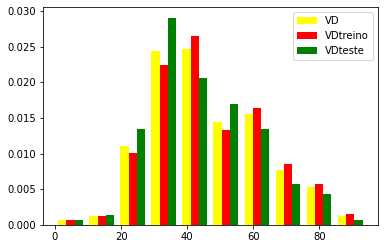

In [60]:
from sklearn.model_selection import train_test_split
from pandas import DataFrame, concat
import matplotlib.pyplot as plt
# note-se q no caso de regressão não é possível usar a amostragem estratificada
VItreino, VIteste, VDtreino, VDteste = train_test_split(VIsNorm, VD, test_size=0.3, random_state=1, shuffle=True)
plt.hist([VD, VDtreino, VDteste], density=True, color=['yellow','red','green'])
plt.legend({'VD':15, 'VDtreino':15, 'VDteste':15})
plt.show()

Apesar de não ter sido usada estratificação as distribuições nas 3 amostras são semelhantes, como é importante q seja.

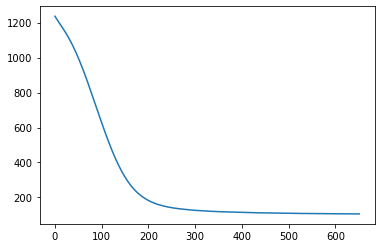

In [57]:
from sklearn.neural_network import MLPRegressor
modelo = MLPRegressor(max_iter=2000, early_stopping=True).fit (VItreino, VDtreino)
plt.plot(modelo.loss_curve_)

modelo com variável boa para treino.

In [62]:
# calculo dos valores de R2
DataFrame({'treino':[modelo.score(VItreino,VDtreino)*100],
           'teste':[modelo.score(VIteste,VDteste)*100]}, index=['R2']).round(1)

,treino,teste
R2,27.0,9.3


<p> Modelo é mau, é importante realçar que para obtermos um modelo perfeito nas redes neuronais é necessáro um garnde volume de dados.</p>

 # Visualização dos pesos

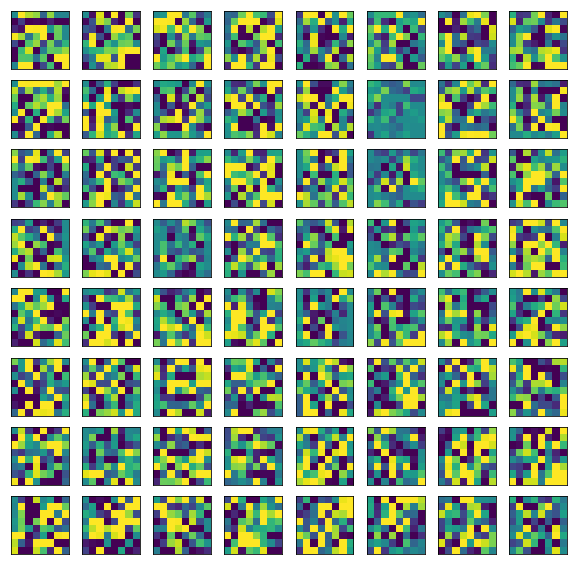

In [94]:
fig, axes = plt.subplots(8, 8, figsize=(10,10)) # 100 neurónios na camada escondida
pesoMin, pesoMax = modelo.coefs_[0].min(), modelo.coefs_[0].max()
for coef, ax in zip(modelo.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(8,8), vmin=.5*pesoMin, vmax=.5*pesoMax)
    ax.set_xticks([])
    ax.set_yticks([])

 os Pesos são adequados 

 # Avaliação e comparação com dados de teste

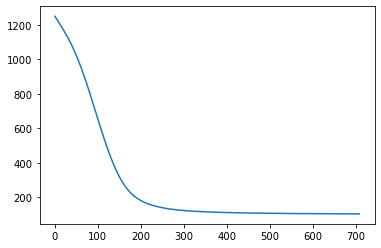

In [91]:
# obter outro modelo para comparação
classificador=MLPRegressor(activation='logistic', solver='sgd', hidden_layer_sizes=(80,), alpha=0.01, early_stopping=True, max_iter=2000)
modeloSGD = classificador.fit (VItreino, VDtreino)
plt.plot(modelo.loss_curve_)

In [92]:
# calculo dos valores de R2
DataFrame({'treino':[modeloSGD.score(VItreino,VDtreino)*100],
           'teste':[modeloSGD.score(VIteste,VDteste)*100]}, index=['R^2']).round(1)

,treino,teste
R^2,23.5,20.4


 Este modelo melhor em relação ao modelo construindo com algoritmo 'Adam'

# Comparação dos modelos 

In [93]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
prev = modelo.predict(VIteste)
prevSGD = modeloSGD.predict(VIteste)
DataFrame({'Adam': [r2_score(VDteste, prev), mean_absolute_error(VDteste, prev), mean_squared_error(VDteste, prev, squared=False)],
         'SGD': [r2_score(VDteste, prevSGD), mean_absolute_error(VDteste, prevSGD), mean_squared_error(VDteste, prevSGD, squared=False)]},
          index=['R2', 'EAM', 'REQM']).round(2)

,Adam,SGD
R2,0.11,0.20
EAM,12.08,11.47
REQM,15.12,14.27


 É possivel perceber que existe uma ligeira diferença entre os dois modelos, o SGD é claramente melhor .

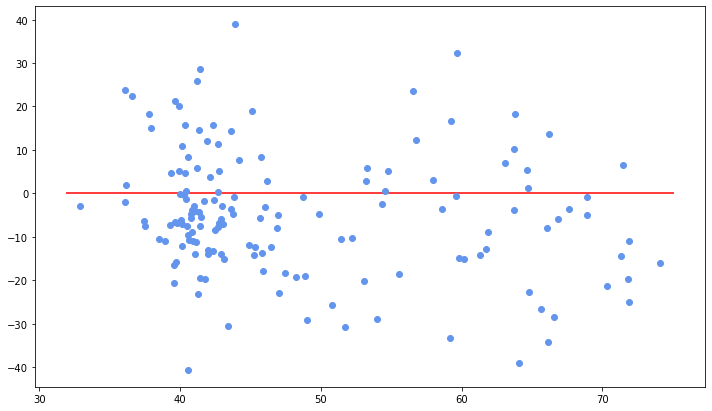

In [95]:
# gráfico de resíduos versus valores previstos
plt.figure(figsize=(12,7))
plt.plot(prev,VDteste-prev,'o',color="cornflowerblue")
plt.hlines(0,prev.min()-1,prev.max()+1, colors='red')

 Para obter um caminho ajustado é necessário remover os pontos que encontra-se dispersos.

In [77]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
VIsAtipicos = VIsNorm.drop([1,100])
VDsAtipicos = VD.drop([1,100])
VItreino, VIteste, VDtreino, VDteste = train_test_split(VIsAtipicos, VDsAtipicos, test_size=0.3, random_state=1, shuffle=True)
modelo = MLPRegressor(max_iter=2000, early_stopping=True).fit (VItreino, VDtreino)
prev = modelo.predict(VIteste)
DataFrame({'Adam': [r2_score(VDteste, prev), mean_absolute_error(VDteste, prev), mean_squared_error(VDteste, prev, squared=False)]},
          index=['R2', 'EAM', 'REQM']).round(2)

,Adam
R2,0.07
EAM,12.65
REQM,16.23


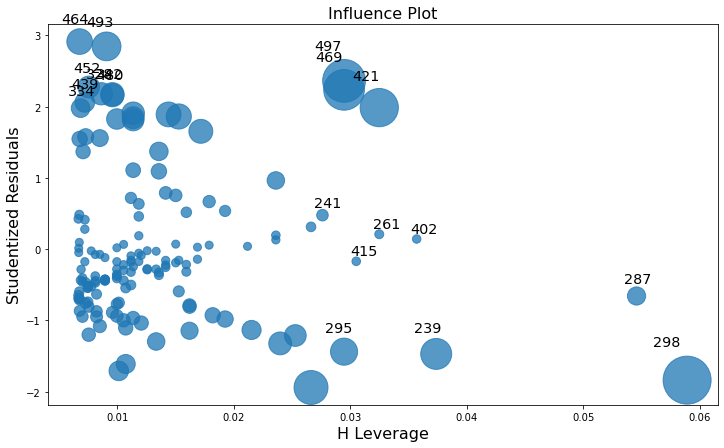

In [78]:
# para verificar a existência de mais pontos influentes:
# como não posso usar o modelo diretamente das RNA vamos fazer uma regressão primerio
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(12,7))
modeloReg = sm.OLS(prev,sm.add_constant(VDteste)).fit()
sm.graphics.influence_plot(modeloReg, criterion="cooks", ax=ax)
plt.show()

 # Algoritmos de classificação com RNAs

In [82]:
from sklearn.datasets import load_digits
dados = load_digits(n_class=9, as_frame=True).frame
dados

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612,0.0,0.0,5.0,12.0,8.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,12.0,12.0,3.0,0.0,0.0,8
1613,0.0,0.0,0.0,3.0,15.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,16.0,4.0,0.0,0.0,4
1614,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1615,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8


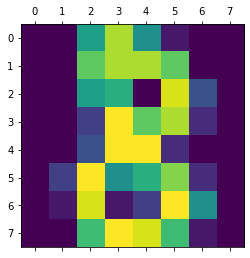

In [85]:
import matplotlib.pyplot as plt
plt.matshow(load_digits(as_frame=True).images[8])

In [86]:
VIs = dados.drop(columns=['target'])
VD = dados['target']
from sklearn.model_selection import train_test_split
VItreino, VIteste, VDtreino, VDteste = train_test_split(VIs, VD, test_size=0.3, random_state=1, shuffle=True, stratify=dados["target"])
from pandas import DataFrame, concat
concat ({'original':VD.value_counts()/len(VD)*100,
         'teste':VDteste.value_counts()/len(VDteste)*100,
         'treino':VDtreino.value_counts()/len(VDtreino)*100}, axis=1).round(1)

,original,teste,treino
0,11.0,11.1,11.0
1,11.3,11.3,11.2
2,10.9,10.9,11.0
3,11.3,11.3,11.3
4,11.2,11.1,11.2
5,11.3,11.3,11.2
6,11.2,11.1,11.2
7,11.1,11.1,11.1
8,10.8,10.7,10.8


# Construção do modelo

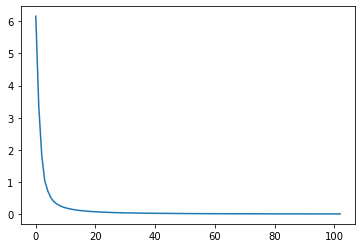

In [87]:
from sklearn.neural_network import MLPClassifier
classificador=MLPClassifier()
modelo = classificador.fit (VItreino, VDtreino)
plt.plot(modelo.loss_curve_)

Possibilidade de sobreajustamento pelos altos valores obtidos do modelo, mas em princípio parece ser execelente.

In [88]:
DataFrame({'treino':[modelo.score(VItreino,VDtreino)*100], 'teste':[modelo.score(VIteste,VDteste)*100]}, index=['accuracy']).round(1)

,treino,teste
accuracy,100.0,97.3


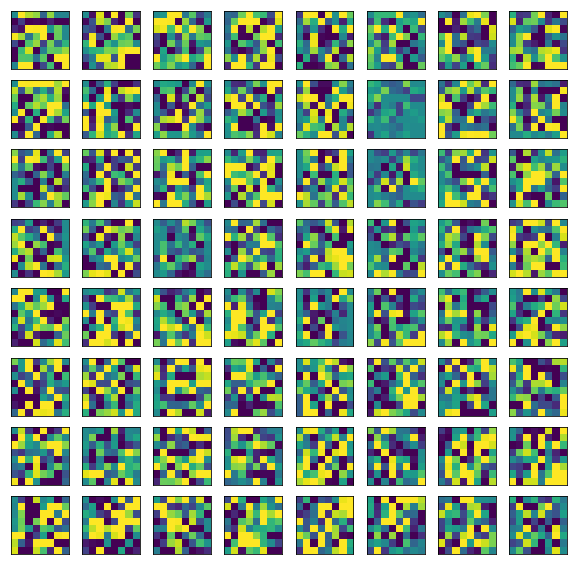

In [95]:
fig, axes = plt.subplots(8, 8, figsize=(10,10)) # 100 neurónios na camada escondida
pesoMin, pesoMax = modelo.coefs_[0].min(), modelo.coefs_[0].max()
for coef, ax in zip(modelo.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(8,8), vmin=.5*pesoMin, vmax=.5*pesoMax)
    ax.set_xticks([])
    ax.set_yticks([])

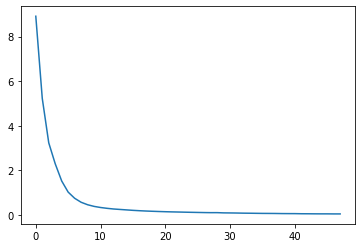

In [90]:
classificador=MLPClassifier(hidden_layer_sizes=(81,), alpha=0.01, early_stopping=True)
modelo = classificador.fit (VItreino, VDtreino)
plt.plot(modelo.loss_curve_)

os valores melhoraram de forma consideravél.

In [92]:
DataFrame({'treino':[modelo.score(VItreino,VDtreino)*100],'teste':[modelo.score(VIteste,VDteste)*100]}, index=['accuracy']).round(1)

,treino,teste
accuracy,98.5,95.7



Ao diminuir os neurónios na camada escondida a diferença entre os pesos de cada neurónio.não é possivel notar a igualidade em nenhum neurónio.

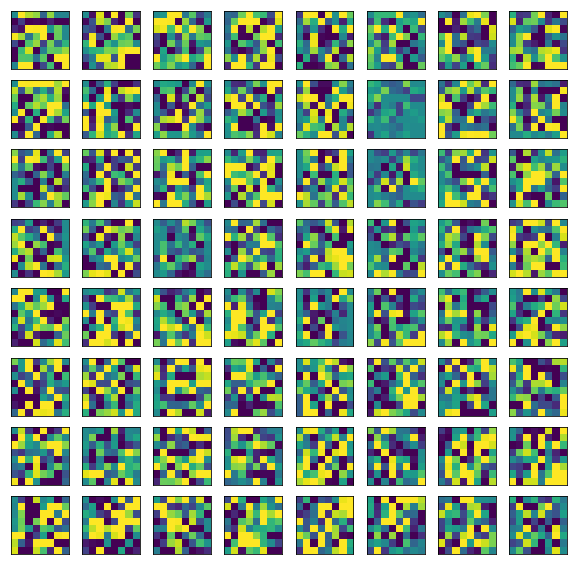

In [97]:
fig, axes = plt.subplots(8, 8, figsize=(10,10))
pesoMin, pesoMax = modelo.coefs_[0].min(), modelo.coefs_[0].max()
for coef, ax in zip(modelo.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(8,8), vmin=.5*pesoMin, vmax=.5*pesoMax)
    ax.set_xticks([])
    ax.set_yticks([])

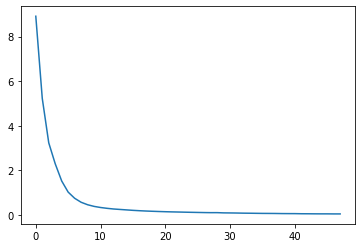

In [98]:
classificador=MLPClassifier(activation='logistic', solver='sgd', hidden_layer_sizes=(81,), alpha=0.01, max_iter=1000)
modeloSGD = classificador.fit (VItreino, VDtreino)
plt.plot(modelo.loss_curve_)

In [99]:
DataFrame({'treino':[modeloSGD.score(VItreino,VDtreino)*100],'teste':[modeloSGD.score(VIteste,VDteste)*100]}, index=['accuracy']).round(1)

,treino,teste
accuracy,99.6,96.5


Os pesos  adequados

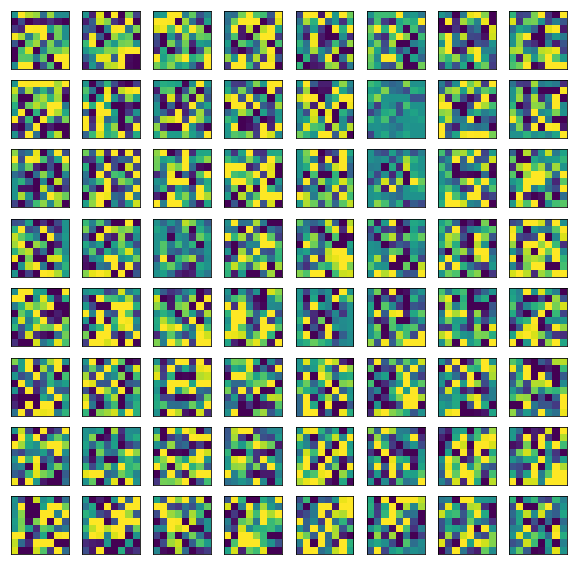

In [101]:
fig, axes = plt.subplots(8, 8, figsize=(10,10))
pesoMin, pesoMax = modeloSGD.coefs_[0].min(), modelo.coefs_[0].max()
for coef, ax in zip(modelo.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(8,8), vmin=.5*pesoMin, vmax=.5*pesoMax)
    ax.set_xticks([])
    ax.set_yticks([])

**todos os modelos são bons, o que quer dizer que podemos utilizar qualquer um deles**

 # Comparação e Avaliação do modelo

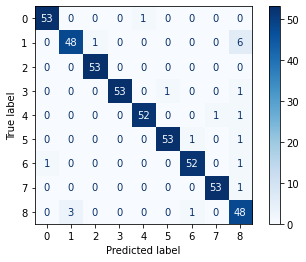

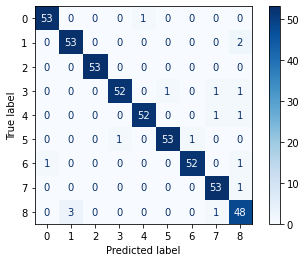

In [103]:
from sklearn.metrics import plot_confusion_matrix
for i in [modelo, modeloSGD]:
    plot_confusion_matrix(i, VIteste, VDteste, display_labels=VD.unique(), cmap=plt.cm.Blues)

In [104]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, matthews_corrcoef
prev = modelo.predict(VIteste)
prevSGD = modeloSGD.predict(VIteste)
DataFrame({'Adam': [accuracy_score(VDteste, prev), cohen_kappa_score(VDteste, prev), matthews_corrcoef(VDteste, prev)],
         'SGD': [accuracy_score(VDteste, prevSGD), cohen_kappa_score(VDteste, prevSGD), matthews_corrcoef(VDteste, prevSGD)]},
          index=['Precisão', 'K de Cohen', 'FI de Matthews']).round(3)

,Adam,SGD
Precisão,0.957,0.965
K de Cohen,0.951,0.961
FI de Matthews,0.952,0.961
